In [130]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [131]:
# Resource information
# https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/

### Preparing My Data

In [133]:
pop = pd.read_csv('~/my.work/PhD/HomestaticExpansionProject/ModelData/AfterCalculations.csv')
# Choosing spleen only data
Splnpop = pop.loc[pop['Organ'] == 'Spleen']

# Removing Ages that we do not have information on in the pop file
CD69Ages = [0,4,7,9,12,14,15,16,18,20]
ActivatedCD4pop = pop[pop.intage.isin(CD69Ages)].copy()

### Preparing Genevieves Activation Data

In [134]:
CD69df = pd.read_csv('~/my.work/PhD/HomestaticExpansionProject/ModelData/CD69DataFromGen.csv')

# Changing IL-2-KO to KO so that the keys match properly
CD69df.loc[CD69df['Genotype'] == 'IL-2-KO', ['Genotype']] = 'KO'
#Selecting only the columns that we want
ACD69df = CD69df[[ 'Age', 'Genotype', 'CD4CD69_pct']]

# Prepping data to calculate activated CD4 T cells

#### Regression formula found in the lm poly 4 in R for the CD69 data

def WTFormula (Age):
    return 19.7332352 - 3.1273219*Age + 0.0837712*Age**2 + 0.0138731*Age**3 - 0.0006277*Age**4
def KOFormula (Age):
    return (8.951248 + 2.383831*Age - 1.320315*Age**2 + 0.150795*Age**3 - 0.004591*Age**4)

In [135]:
# w,k = WTFormula(9),KOFormula(9)
# print(w,k)

#Results from the polynomial
FormResults = ([7, "WT",5.198136],
              [7, "KO", 1.642324],
              [9, "WT", 4.367956],
              [9, "KO", 3.268216])


#Grouping and finding the mean
GmCD69 = ACD69df.groupby( [ "Age", "Genotype"] ).mean().reset_index()

#Adding the results from the formula to the groupby mean results of CD69 data
for i in FormResults:
    GmCD69.loc[len(GmCD69)] = i
    

# Calculating all activated CD4 T cells

In [136]:
def NumOfActivatedCD4(grp):
    '''
    This will take one pop group and finds the equivalent group from the GmCD69 group, 
    then takes the percentage from the appropriate GmCD69 percentage and multiplies it to the pop CD4CT group.
    Requirement:
         age = grp.name[0]
         Genotype = str(grp.name[1])
    '''

#The CD4Tcell groups equivalent to the CD69 data groups. This 
    pct = GmCD69.loc[(GmCD69['Age'] == grp.name[0]) & (GmCD69['Genotype']==str(grp.name[1]))]['CD4CD69_pct'].iloc[0]
    pct = pct / 100
    return grp * pct
    

In [137]:
# Translation of the groupby: make groups out of age and Genotype, 
#then take the CD4CT value run it through the function
ActivatedCD4pop['ActivatedCD4CT'] = ActivatedCD4pop.groupby( [ "intage", "Genotype"] )['CD4CT'].apply(NumOfActivatedCD4)

KeyError: 'Column not found: NoTregCD4CT'

In [129]:
ActivatedCD4pop.to_csv('/home/jon/my.work/PhD/HomestaticExpansionProject/ModelData/ActivatedCD4pop.csv')

In [128]:
a = ActivatedCD4pop[['Age', 'Genotype', 'Organ', 'CD4CT', 'ActivatedCD4CT']]
a.to_csv('/home/jon/Desktop/ActivatedCD4pop.csv')

In [95]:
a = ActivatedCD4pop.groupby( [ "intage", "Genotype"] )['CD4CT']
a.groups.keys()

dict_keys([(0, 'KO'), (0, 'WT'), (4, 'KO'), (4, 'WT'), (7, 'KO'), (7, 'WT'), (9, 'KO'), (9, 'WT'), (12, 'KO'), (12, 'WT'), (14, 'KO'), (14, 'WT'), (18, 'KO'), (18, 'WT')])

In [24]:
def NumOfActivatedCD4(grp):
#     age = grp.name[0]
#     Genotype = str(grp.name[1])
# '''

# This takes the CD4CD69 positive percentages and multiplies it to the CD4 count
# this is completely reliant on the CD69 data set to have two columns as a conditional, and the keys of our groupby 
# determines what those conidtions are
# '''
    pct = AGmCD69.loc[(AGmCD69['Age'] == grp.name[0]) & (AGmCD69['Genotype']==str(grp.name[1]))]['CD4CD69_pct'].iloc[0]
    pct = pct / 100
    return grp * pct
    

# Practicing the groupby applies


In [25]:
#Prepping the data
ApopA = popA.loc[(popA.intage == 4) | (popA.intage == 7)].copy()
AGmCD69 = GmCD69.loc[(GmCD69.Age == 4) | (GmCD69.Age == 7)].copy()

In [26]:
ApopA

,intage,Genotype,CD4CT
16,7,WT,0.404333
17,7,KO,0.230798
18,7,KO,0.313847
37,7,WT,0.465259
38,7,KO,0.287034
39,7,WT,0.354771
40,7,KO,0.319590
41,4,WT,0.232300
42,4,KO,0.328220
51,4,WT,0.081874


In [27]:
def ANumOfActivatedCD4(grp):
#     age = grp.name[0]
#     Genotype = str(grp.name[1])
# '''
# This takes the CD4CD69 positive percentages and multiplies it to the CD4 count
# this is completely reliant on the CD69 data set to have two columns as a conditional, and the keys of our groupby 
# determines what those conidtions are
# '''
    pct = AGmCD69.loc[(AGmCD69['Age'] == grp.name[0]) & (AGmCD69['Genotype']==str(grp.name[1]))]['CD4CD69_pct'].iloc[0]
    pct = pct / 100
    return grp * pct
    

In [28]:


def Testname(grp):
    a = int(grp.name[0])
    return a

In [29]:
ApopA['Test'] = ApopA.groupby( [ "intage", "Genotype"] )['CD4CT'].transform(Testname)

In [30]:
ApopA.groupby( [ "intage", "Genotype"] ).apply(lambda x: print(x.name[1]))

KO
KO
WT
KO
WT


""


In [31]:
ApopA['ActivatedCD4CT'] = ApopA.groupby( [ "intage", "Genotype"] )['CD4CT'].apply(ANumOfActivatedCD4)
ApopA['NonActivated'] = ApopA['CD4CT'] - ApopA['ActivatedCD4CT']
ApopA['Activated_Pct'] = ApopA['ActivatedCD4CT'] / ApopA['CD4CT']

In [32]:
ApopA

,intage,Genotype,CD4CT,Test,ActivatedCD4CT,NonActivated,Activated_Pct
16,7,WT,0.404333,7.0,0.021018,0.383315,0.051981
17,7,KO,0.230798,7.0,0.003790,0.227007,0.016423
18,7,KO,0.313847,7.0,0.005154,0.308693,0.016423
37,7,WT,0.465259,7.0,0.024185,0.441074,0.051981
38,7,KO,0.287034,7.0,0.004714,0.282320,0.016423
39,7,WT,0.354771,7.0,0.018441,0.336329,0.051981
40,7,KO,0.319590,7.0,0.005249,0.314341,0.016423
41,4,WT,0.232300,4.0,0.022123,0.210177,0.095233
42,4,KO,0.328220,4.0,0.022527,0.305693,0.068633
51,4,WT,0.081874,4.0,0.007797,0.074077,0.095233


In [34]:
#Takes value from the cells that we want in the CD69 df
CD69_pct = AGmCD69.loc[(AGmCD69['Age'] == 4) & (AGmCD69['Genotype']=='KO')]['CD4CD69_pct'].iloc[0]

In [36]:
#Getting the keys from the group by
a = ApopA.groups.keys()


AttributeError: 'DataFrame' object has no attribute 'groups'

In [255]:
a = list(a)
b = a[1]
b[0]


4

In [280]:
def NumOfActivatedCD4 (data, pct):
    #percentage comes in whole numbers
    ppct = pct/100
    data['CD4CD69_ct'] = data['CD4CT'] * ppct
    return data

In [ ]:
def func(group, CD69_pct):
    group['CD4CD69_ct'] = group['CD4CT'] * CD69_pct
    return group

In [290]:
for key, group in GrpApopA:
    #Get the CD69 Percentage
    CD69_pct = AGmCD69.loc[(AGmCD69['Age'] == key[0]) & (AGmCD69['Genotype']==str(key[1]))]['CD4CD69_pct'].iloc[0]
    #percentage comes in whole numbers
    CD69_pct = CD69_pct/100
    group['CD4CD69_ct'] = group['CD4CT'] * CD69_pct
#     print(group)
#     print()

/home/jon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# What is wrong with this damn function?

In [ ]:
def NumOfActivatedCD4(grp):
#     age = grp.name[0]
#     Genotype = str(grp.name[1])
# '''
# This takes the CD4CD69 positive percentages and multiplies it to the CD4 count
# this is completely reliant on the CD69 data set to have two columns as a conditional, and the keys of our groupby 
# determines what those conidtions are
# '''
    pct = AGmCD69.loc[(AGmCD69['Age'] == grp.name[0]) & (AGmCD69['Genotype']==str(grp.name[1]))]['CD4CD69_pct'].iloc[0]
    pct = pct / 100
    return grp * pct

In [368]:
def IsItTheKeys(grp):
    pct = AGmCD69.loc[(AGmCD69['Age'] == grp.name[0]) & (AGmCD69['Genotype']==str(grp.name[1]))]['CD4CD69_pct'].iloc[0]
    print(grp.name)
    print(grp.name[0])
    print(grp.name[1])
    print(pct)
    

In [ ]:
# Removing Ages that we do not have information on in the pop file

CD69Ages = [0,4,7,9,12,14,15,16,18,20]
ActivatedCD4pop = pop[pop.intage.isin(CD69Ages)]
# GmCD69 - the CD69 data

In [380]:
pop['ActivatedCD4CT'] = pop.groupby( [ "intage", "Genotype"] )['CD4CT'].apply(NumOfActivatedCD4)

IndexError: single positional indexer is out-of-bounds

# Plotting the results of the Activated Functions

In [30]:
ActivatedCD4pop.to_csv('/home/jon/my.work/PhD/Homestatic Expansion Project/ModelData/ActivatedCD4pop.csv')

In [381]:
ActivatedCD4pop['ActivatedCD4CT'] = ActivatedCD4pop.groupby( [ "intage", "Genotype"] )['CD4CT'].apply(NumOfActivatedCD4)

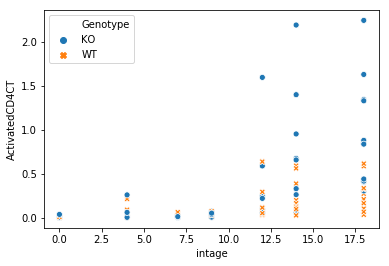

In [89]:
ax = sns.scatterplot(y="ActivatedCD4CT", x="intage",
                     hue="Genotype", data=ActivatedCD4pop, style = "Genotype")

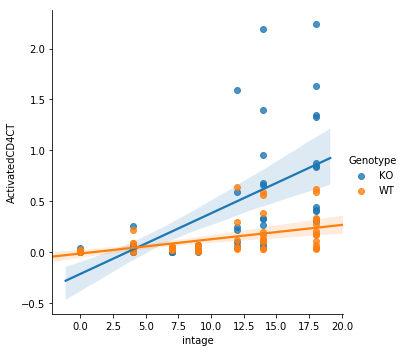

In [90]:
sns.lmplot(y="ActivatedCD4CT", x="intage",
                     hue="Genotype", data=ActivatedCD4pop)


# Moving all of the practice code down here

In [45]:
popA = pop[['intage', 'Genotype', 'CD4CT']]
list(popA)

['intage', 'Genotype', 'CD4CT']

In [44]:
popAG = popA.groupby(['intage', 'Genotype'])

In [17]:
for name, group in popAG: 
    # print the name of the regiment
    print(name)

(0, 'KO')
(0, 'WT')
(4, 'KO')
(4, 'WT')
(7, 'KO')
(7, 'WT')
(9, 'KO')
(9, 'WT')
(12, 'KO')
(12, 'WT')
(14, 'KO')
(14, 'WT')
(18, 'KO')
(18, 'WT')
(56, 'WT')


In [81]:
ActivatedCD4pop.groupby( [ "intage", "Genotype"] ).apply(lambda x: print(x.name) )

(0, 'KO')
(0, 'KO')
(0, 'WT')
(4, 'KO')
(4, 'WT')
(7, 'KO')
(7, 'WT')
(9, 'KO')
(9, 'WT')
(12, 'KO')
(12, 'WT')
(14, 'KO')
(14, 'WT')
(18, 'KO')
(18, 'WT')


""


In [151]:
import pandas as pd
import numpy as np
from collections import Counter

In [152]:
# Resource information
# https://chrisalbon.com/python/data_wrangling/pandas_apply_operations_to_groups/

### Preparing My Data

In [153]:
pop = pd.read_csv("~/my.work/PhD/HomestaticExpansionProject/ModelData/NaiveTregDifferentiation.csv")
# Choosing spleen only data
Splnpop = pop.loc[pop['Organ'] == 'Spleen']

# Removing Ages that we do not have information on in the pop file
CD69Ages = [0,4,7,9,12,14,15,16,18,20]
ActivatedCD4pop = pop[pop.intage.isin(CD69Ages)].copy()

### Preparing Genevieves Activation Data

In [154]:
CD69df = pd.read_csv('~/my.work/PhD/HomestaticExpansionProject/ModelData/CD69DataFromGen.csv')

# Changing IL-2-KO to KO so that the keys match properly
CD69df.loc[CD69df['Genotype'] == 'IL-2-KO', ['Genotype']] = 'KO'
#Selecting only the columns that we want
ACD69df = CD69df[[ 'Age', 'Genotype', 'CD4CD69_pct']]

# Prepping data to calculate activated CD4 T cells

#### Regression formula found in the lm poly 4 in R for the CD69 data

def WTFormula (Age):
    return 19.7332352 - 3.1273219*Age + 0.0837712*Age**2 + 0.0138731*Age**3 - 0.0006277*Age**4
def KOFormula (Age):
    return (8.951248 + 2.383831*Age - 1.320315*Age**2 + 0.150795*Age**3 - 0.004591*Age**4)

In [155]:
# w,k = WTFormula(9),KOFormula(9)
# print(w,k)

#Results from the polynomial
FormResults = ([7, "WT",5.198136],
              [7, "KO", 1.642324],
              [9, "WT", 4.367956],
              [9, "KO", 3.268216])


#Grouping and finding the mean
GmCD69 = ACD69df.groupby( [ "Age", "Genotype"] ).mean().reset_index()

#Adding the results from the formula to the groupby mean results of CD69 data
for i in FormResults:
    GmCD69.loc[len(GmCD69)] = i
    

# Calculating all activated CD4 T cells

In [156]:
def NumOfActivatedCD4(grp):
    '''
    This will take one pop group and finds the equivalent group from the GmCD69 group, 
    then takes the percentage from the appropriate GmCD69 percentage and multiplies it to the pop CD4CT group.
    Requirement:
         age = grp.name[0]
         Genotype = str(grp.name[1])
    '''

#The CD4Tcell groups equivalent to the CD69 data groups. This 
    pct = GmCD69.loc[(GmCD69['Age'] == grp.name[0]) & (GmCD69['Genotype']==str(grp.name[1]))]['CD4CD69_pct'].iloc[0]
    pct = pct / 100
    return grp * pct
    

In [157]:
# Translation of the groupby: make groups out of age and Genotype, 
#then take the CD4CT value run it through the function
ActivatedCD4pop['ActivatedCD4CT'] = ActivatedCD4pop.groupby( [ "intage", "Genotype"] )['NoTregCD4CT'].apply(NumOfActivatedCD4)

In [158]:
ActivatedCD4pop.to_csv('/home/jon/my.work/PhD/HomestaticExpansionProject/ModelData/ActivatedCD4pop2.csv')